In [48]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [2]:
dt = pd.read_csv("delivery_time.csv")

In [3]:
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
dt = dt.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
dt

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [10]:
dt.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [11]:
dt[dt.duplicated()].shape

(0, 2)

In [15]:
dt[dt.duplicated()]

,Delivery_Time,Sorting_Time


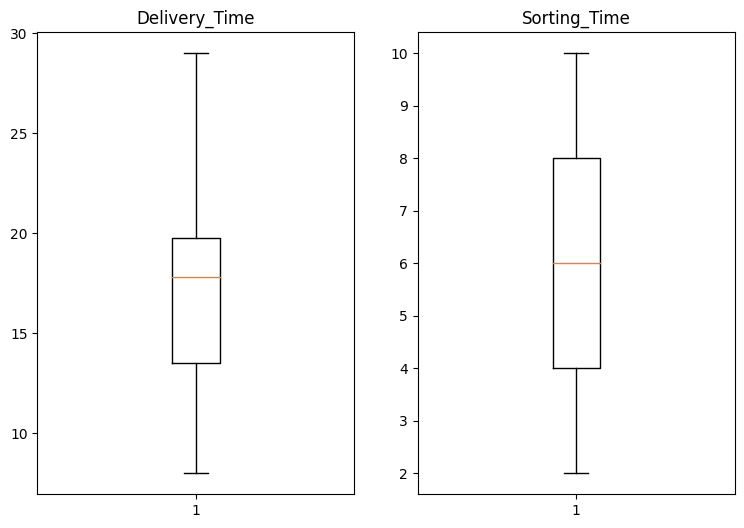

In [18]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(dt['Delivery_Time'])
plt.title('Delivery_Time')
plt.subplot(122)
plt.boxplot(dt['Sorting_Time'])
plt.title('Sorting_Time')
plt.show()

In [19]:
dt.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [23]:
dt.var()

Delivery_Time    25.754619
Sorting_Time      6.461905
dtype: float64

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

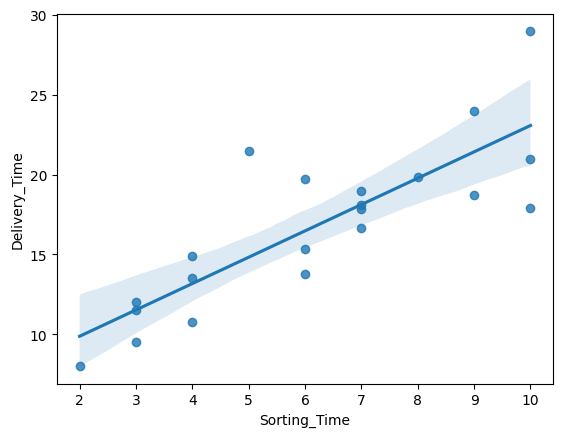

In [20]:
sns.regplot(x = dt["Sorting_Time"],y = dt["Delivery_Time"])

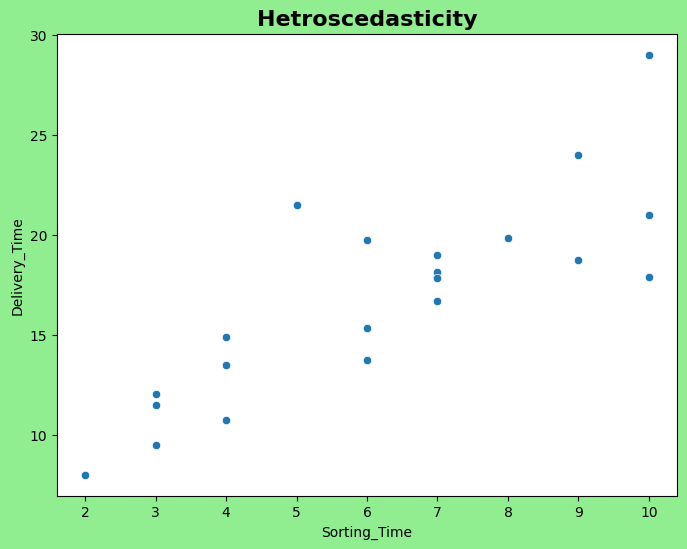

In [22]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = dt['Sorting_Time'], y = dt['Delivery_Time'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

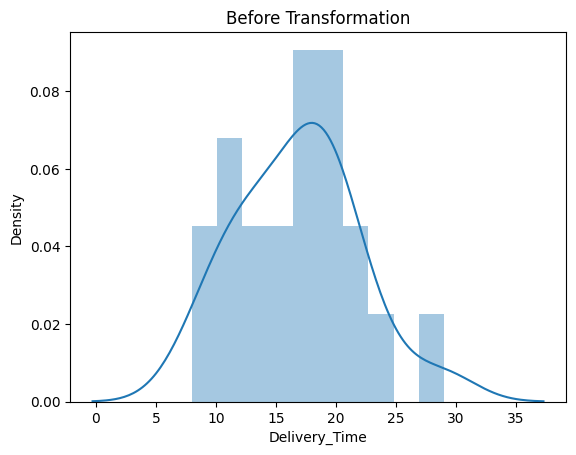

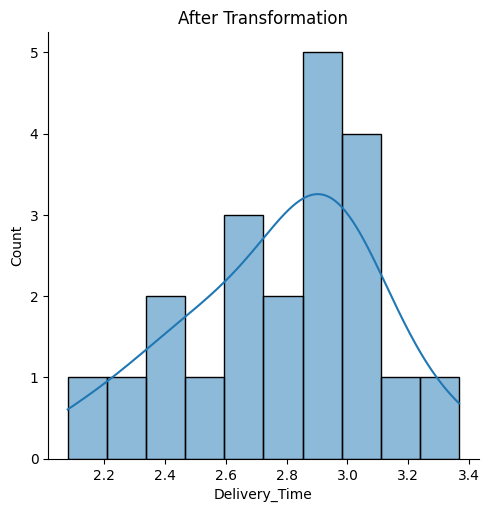

In [28]:
sns.distplot(dt['Delivery_Time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(dt['Delivery_Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

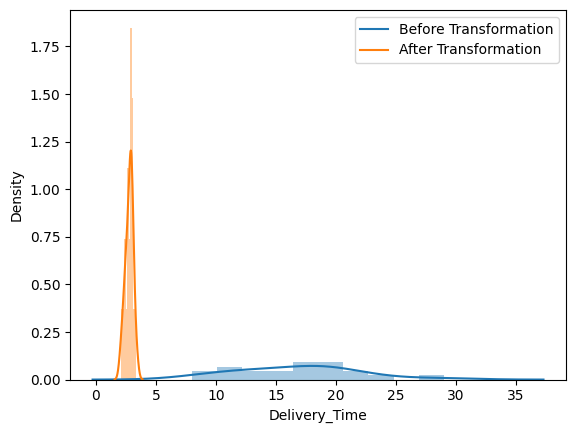

In [29]:
labels = ['Before Transformation','After Transformation']
sns.distplot(dt['Delivery_Time'], bins = 10, kde = True)
sns.distplot(np.log(dt['Delivery_Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

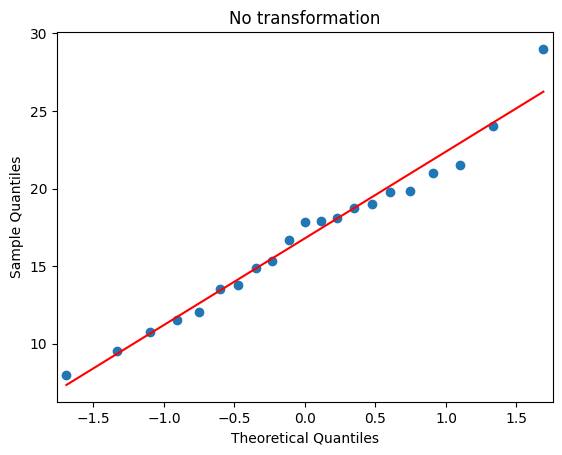

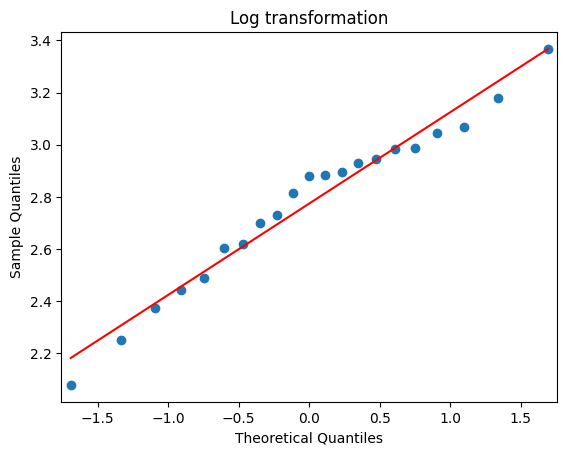

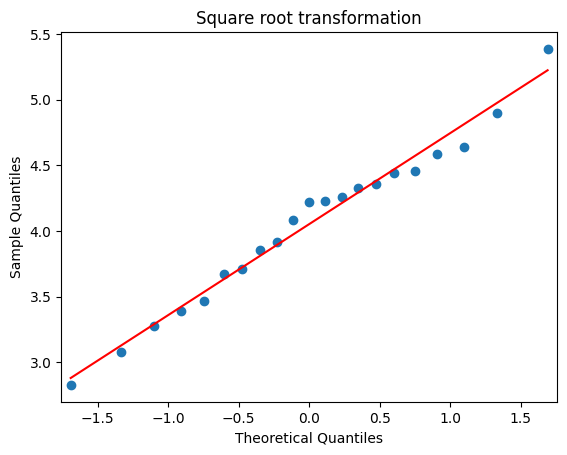

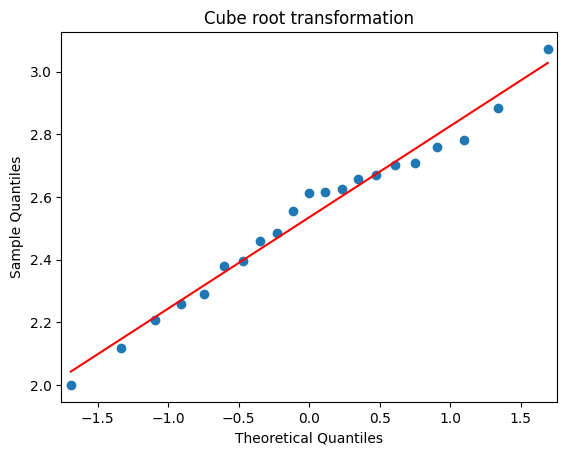

In [30]:
smf.qqplot(dt['Delivery_Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(dt['Delivery_Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(dt['Delivery_Time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(dt['Delivery_Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

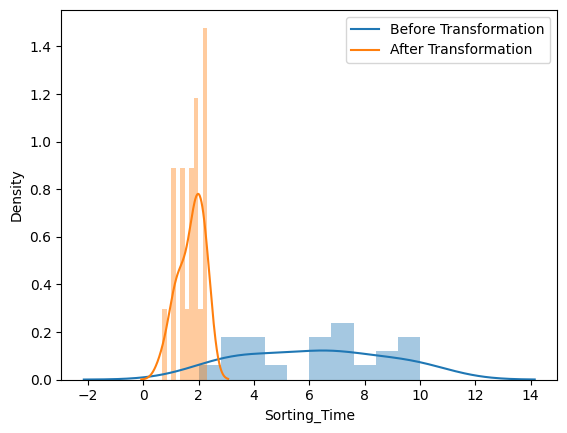

In [31]:
labels = ['Before Transformation','After Transformation']
sns.distplot(dt['Sorting_Time'], bins = 10, kde = True)
sns.distplot(np.log(dt['Sorting_Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

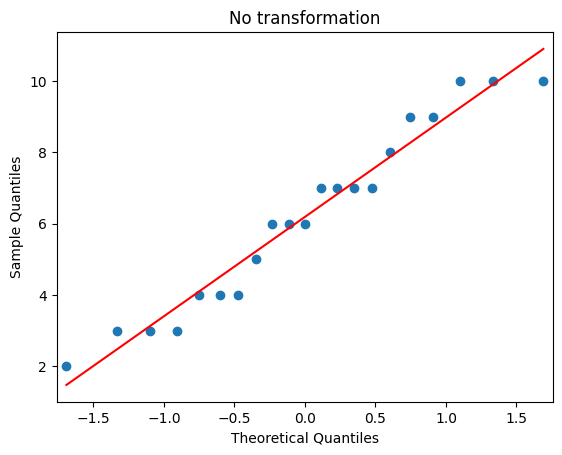

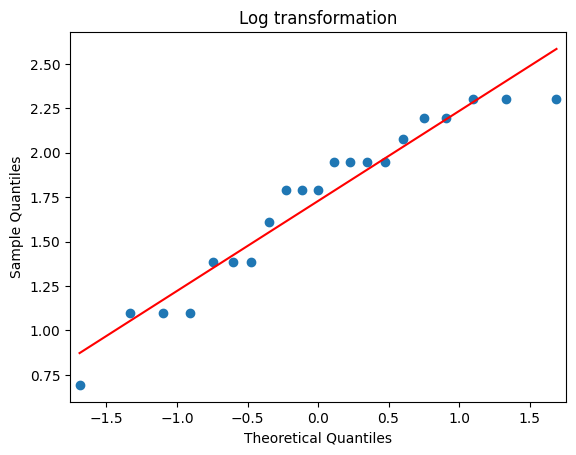

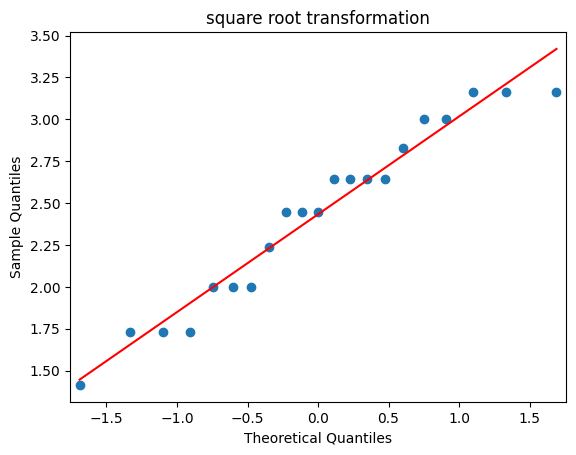

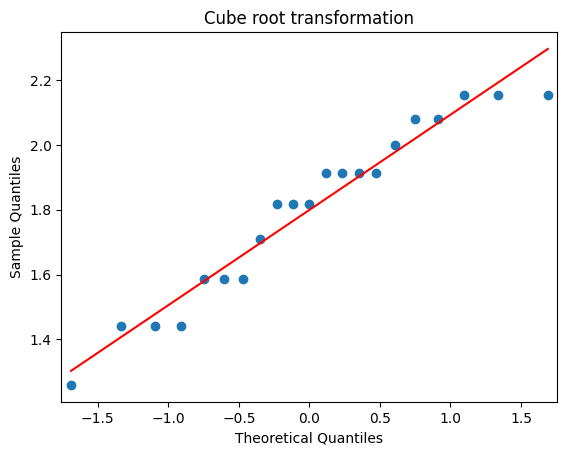

In [32]:
smf.qqplot(dt['Sorting_Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(dt['Sorting_Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(dt['Sorting_Time']), line = 'r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(dt['Sorting_Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [33]:
model = sm.ols('Delivery_Time~Sorting_Time', data = dt).fit()

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        05:36:15   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#squareroot transformation of data
model1 = sm.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = dt).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Tue, 23 Jan 2024   Prob (F-statistic):           8.48e-07
Time:                            05:37:38   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# cuberoot transformation of data
model2 = sm.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data = dt).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_Time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Tue, 23 Jan 2024   Prob (F-statistic):           4.90e-07
Time:                            05:38:04   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_Time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model3 = sm.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = dt).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Tue, 23 Jan 2024   Prob (F-statistic):           1.60e-07
Time:                           05:38:26   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model.params

"""
Here, (Intercept) Beta0 value = 6.58 & (Sorting Time) Beta1 value = 1.64
Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)
Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)"""

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [39]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [40]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

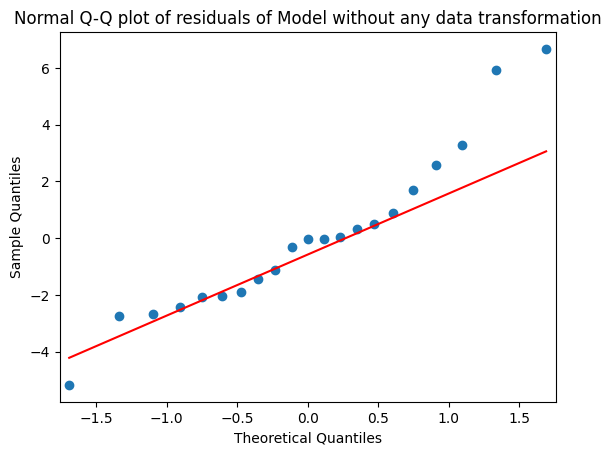

In [43]:
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

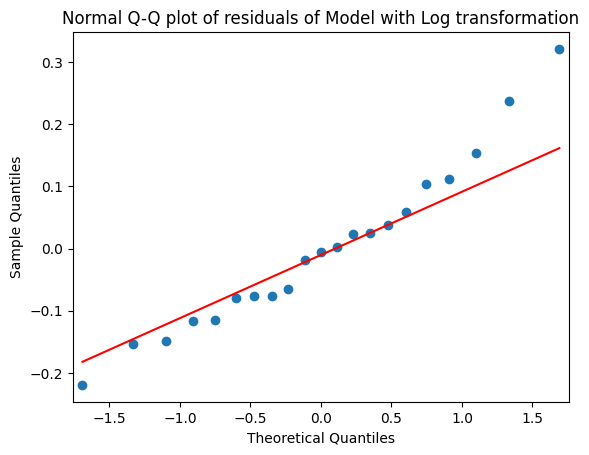

In [44]:
sm.qqplot(model2.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Log transformation')
plt.show()

In [45]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

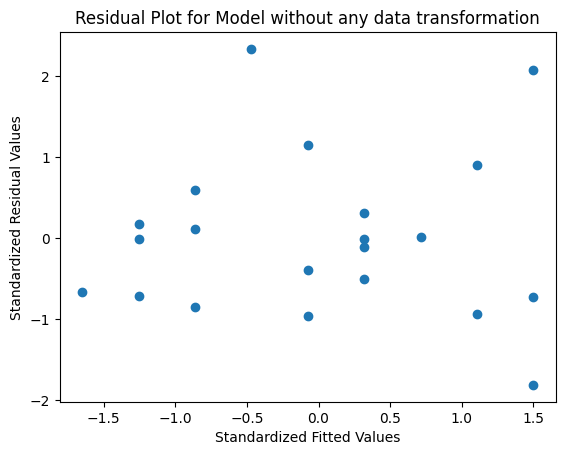

In [46]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

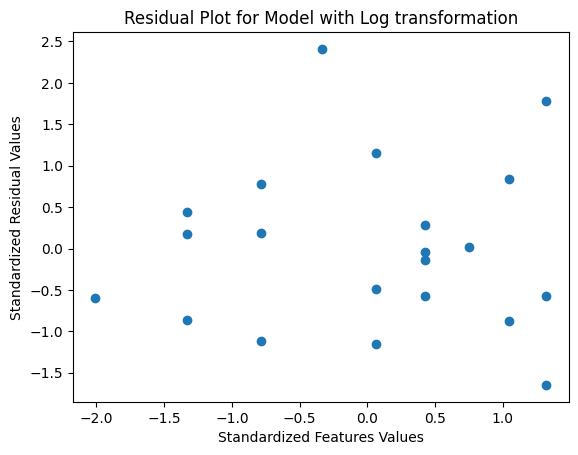

In [47]:
plt.scatter(get_standardized_values(model2.fittedvalues), get_standardized_values(model2.resid))
plt.title('Residual Plot for Model with Log transformation')
plt.xlabel('Standardized Features Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [49]:
model1_pred_y =np.square(model1.predict(dt['Sorting_Time']))
model2_pred_y =pow(model2.predict(dt['Sorting_Time']),3)
model3_pred_y =np.exp(model3.predict(dt['Sorting_Time']))

In [50]:
model1_rmse =np.sqrt(mean_squared_error(dt['Delivery_Time'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(dt['Delivery_Time'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(dt['Delivery_Time'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 2.934903768890139 
model1= 2.762294279320867 
model2= 2.755584309893576 
model3= 2.745828897614548


In [51]:
data = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(data, key=data.get)

'model2'

In [52]:
predicted = pd.DataFrame()
predicted['Sorting_Time'] = dt.Sorting_Time
predicted['Delivery_Time'] = dt.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model2.predict(predicted.Sorting_Time)))
predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,17.035997
1,4,13.50,10.547128
2,6,19.75,12.808396
3,9,24.00,15.997918
4,10,29.00,17.035997
5,6,15.35,12.808396
6,7,19.00,13.889274
7,3,9.50,9.328887
8,10,17.90,17.035997
9,9,18.75,15.997918


In [53]:
predicted1 = pd.DataFrame()
predicted1['Sorting_Time'] = dt.Sorting_Time
predicted1['Delivery_Time'] = dt.Delivery_Time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted1.Sorting_Time))
predicted1

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
